In [1]:
# Importing and naming packages/libraries to be used
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean.csv")

C1:  Data Cleaning

In [3]:
# Check for outliers
# Check for missing data
# Check for duplicates

In [4]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [5]:
# Checking for missing data
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

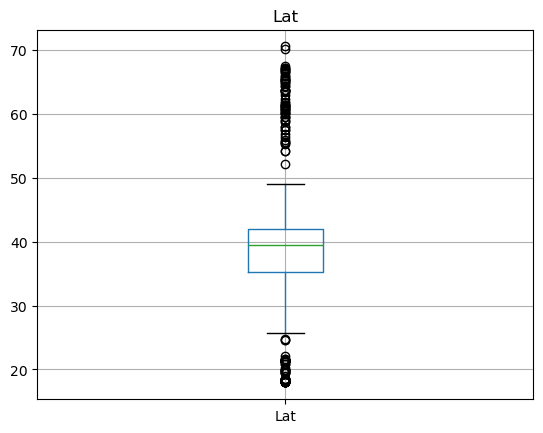

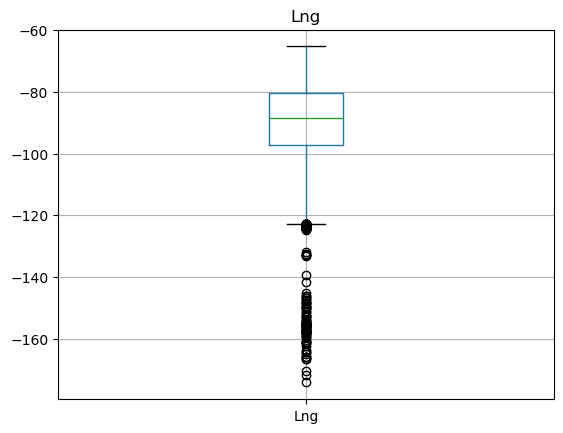

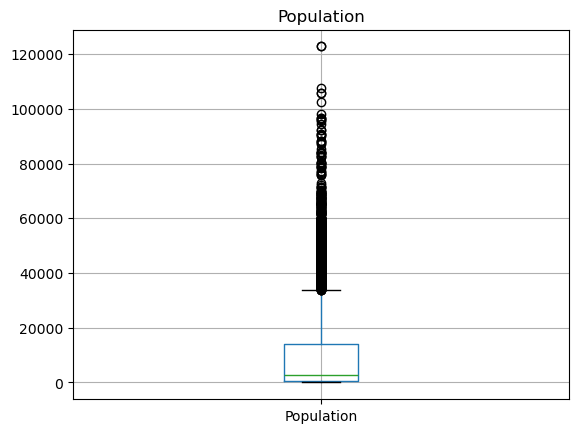

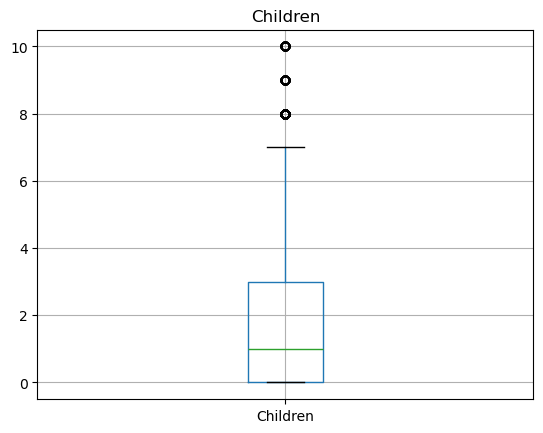

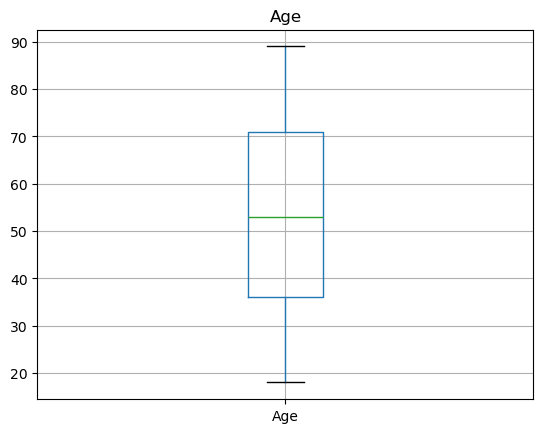

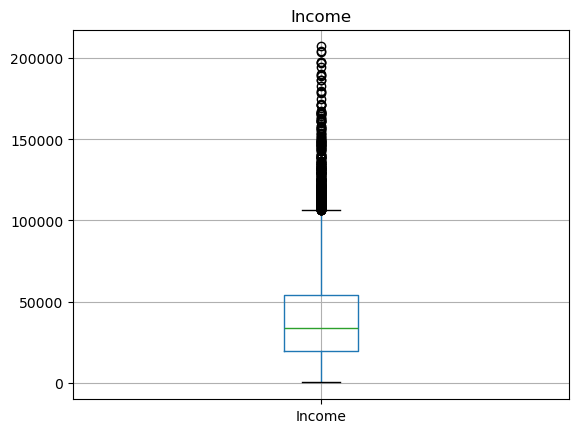

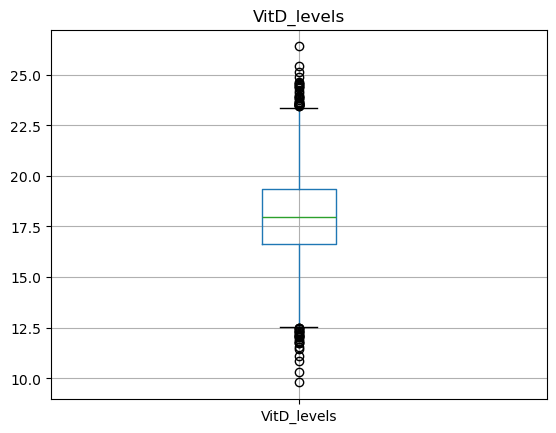

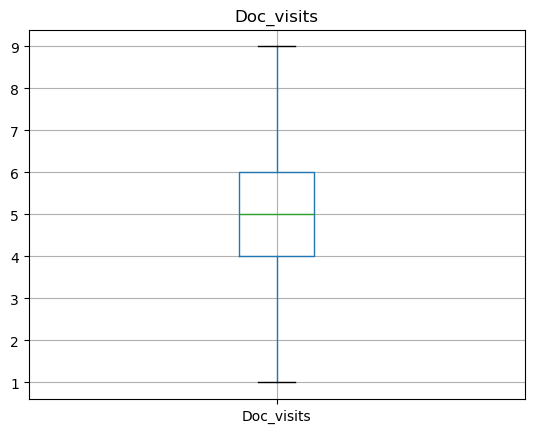

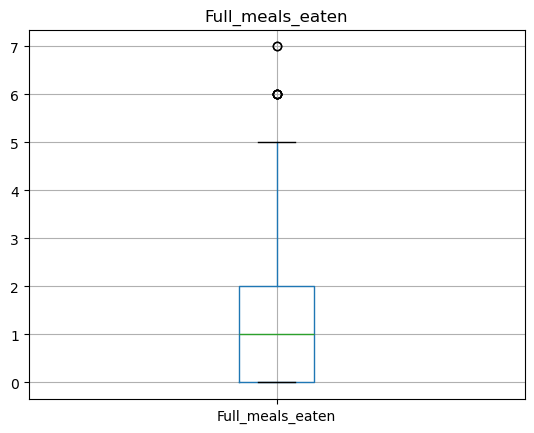

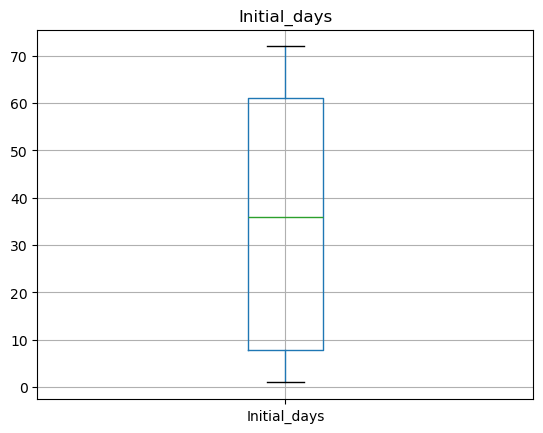

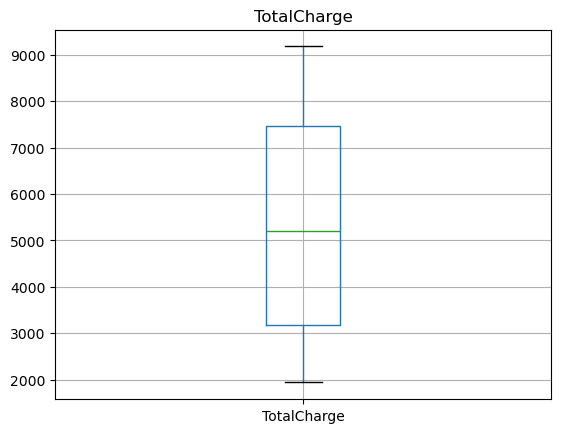

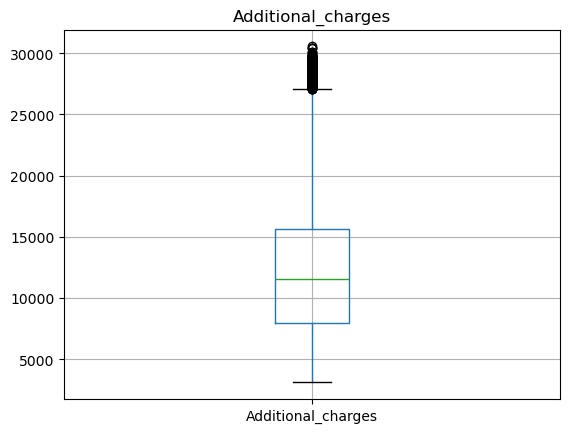

In [6]:
# Checking for outliers in quantitative variables

quant_columns = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

C2:  Summary Statistics

In [8]:
# Describe() all independent varaibles being used and the dependent

In [9]:
# Dependent variable
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [10]:
# Independent variables below

In [11]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [12]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [13]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [14]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [15]:
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [16]:
df.Soft_drink.value_counts()

Soft_drink
No     7425
Yes    2575
Name: count, dtype: int64

In [17]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [18]:
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [19]:
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [20]:
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [21]:
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [22]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [23]:
df.Asthma.value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [24]:
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

C3:  Visualizations

In [26]:
# Univariates (all independent and the dependent)

In [27]:
# Dependent

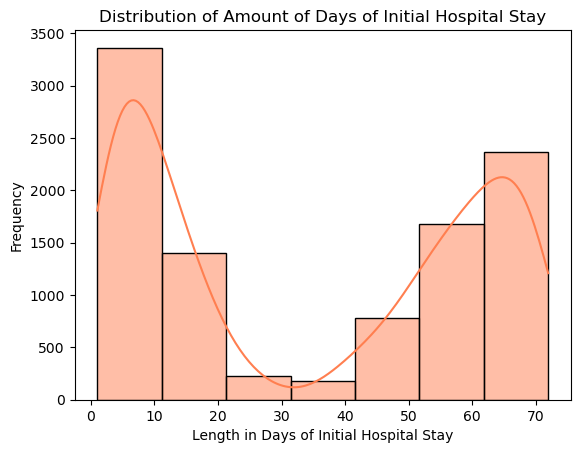

In [28]:
plt.title("Distribution of Amount of Days of Initial Hospital Stay")
plt.ylabel("Frequency")
plt.xlabel("Length in Days of Initial Hospital Stay")
seaborn.histplot(df['Initial_days'], bins=7, color="coral", edgecolor="black", kde=True)
plt.show()

In [29]:
# Independent variables

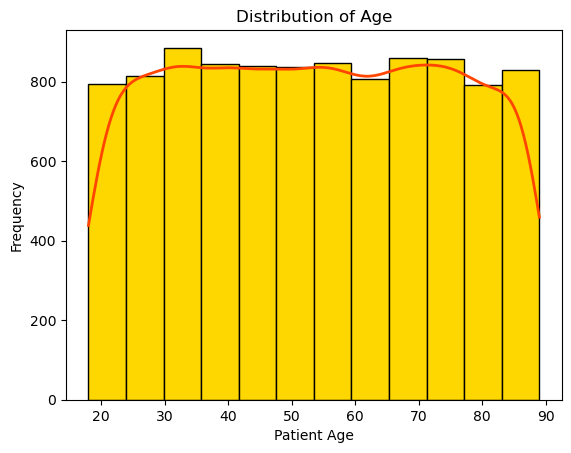

In [30]:
plt.title("Distribution of Age")
plt.ylabel("Frequency")
plt.xlabel("Patient Age")

seaborn.histplot(df['Age'], bins=12, color="orangered", kde=True, line_kws={'lw': 2}, facecolor='gold', edgecolor='black')
plt.show()

Text(0, 0.5, 'Frequency')

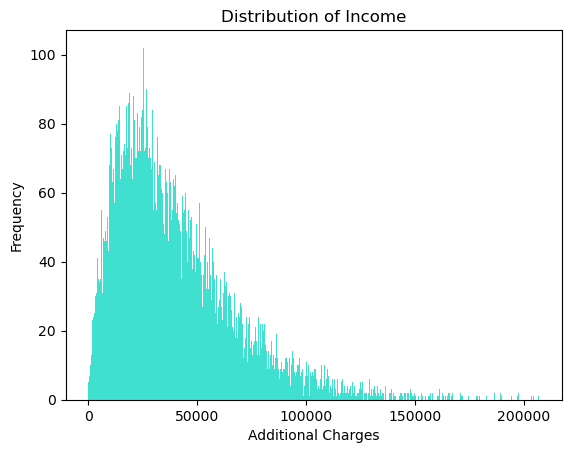

In [31]:
plt.title("Distribution of Income")
plt.hist(data=df, x="Income", bins=500, color="turquoise")
plt.xlabel("Additional Charges")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

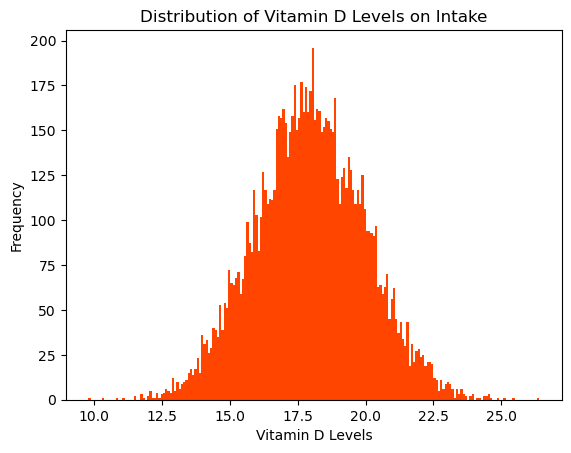

In [32]:
# VitD_levels
plt.title("Distribution of Vitamin D Levels on Intake")
plt.hist(data=df, x="VitD_levels", bins=200, color="orangered")
plt.xlabel("Vitamin D Levels")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

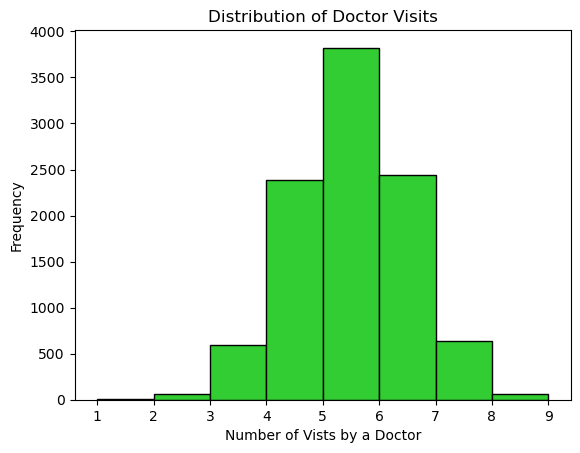

In [33]:
# Doc_visits
plt.title("Distribution of Doctor Visits")
plt.hist(data=df, x="Doc_visits", bins=8, color="limegreen", edgecolor="black")
plt.xlabel("Number of Vists by a Doctor")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

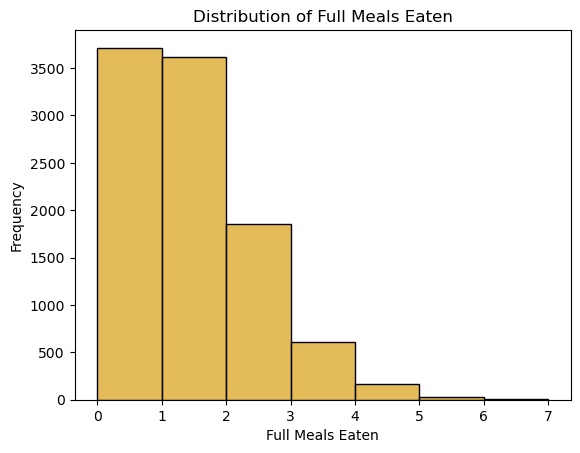

In [34]:
# Full_meals_eaten
plt.title("Distribution of Full Meals Eaten")
seaborn.histplot(data=df, x="Full_meals_eaten", bins=7, color="goldenrod", edgecolor="black")
plt.xlabel("Full Meals Eaten")
plt.ylabel("Frequency")

In [35]:
# Soft_drink


Text(0, 0.5, 'Frequency')

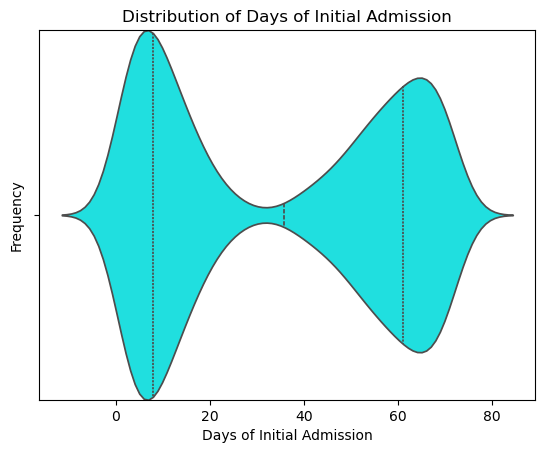

In [36]:
plt.title("Distribution of Days of Initial Admission")
seaborn.violinplot(data=df, x="Initial_days", cut=3, density_norm="count", width=1, color="cyan", inner="quartile")
plt.xlabel("Days of Initial Admission")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x19fe52db410>,
 [Text(-0.020921706571018026, -1.1098028123023282, 'Emergency Admission'),
  Text(-0.7537249339364316, 0.8148611685204553, 'Elective Admission'),
  Text(0.8005098780180698, 0.7689498912123567, 'Observation Admission')],
 [Text(-0.011497514421910805, -0.6098916355895676, '50.6%'),
  Text(-0.41420919792902994, 0.44780658810583573, '25.0%'),
  Text(0.439919842874795, 0.4225760663419257, '24.4%')])

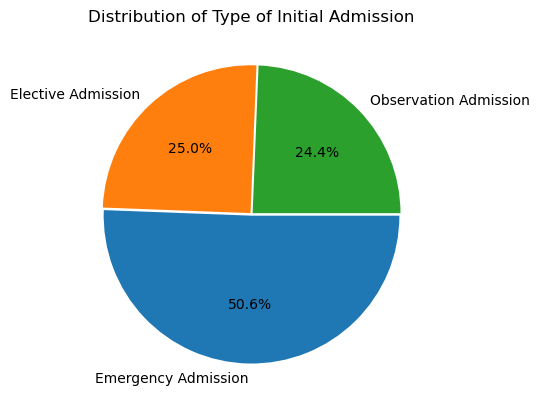

In [37]:
initial_admin_counts = df["Initial_admin"].value_counts()
initial_admin_labels = ["Emergency Admission", "Elective Admission", "Observation Admission"]
explode = [0.01, 0.01, 0.01]

plt.title("Distribution of Type of Initial Admission")
plt.pie(initial_admin_counts, labels=initial_admin_labels, explode=explode, autopct='%.01f%%', counterclock=False)


([<matplotlib.patches.Wedge at 0x19fe51b07d0>,
 [Text(-0.310207301470972, 1.0553536990573813, 'Yes'),
  Text(0.31020740028031507, -1.055353670013673, 'No')],
 [Text(-0.16920398262053013, 0.575647472213117, '59.1%'),
  Text(0.16920403651653546, -0.5756474563710943, '40.9%')])

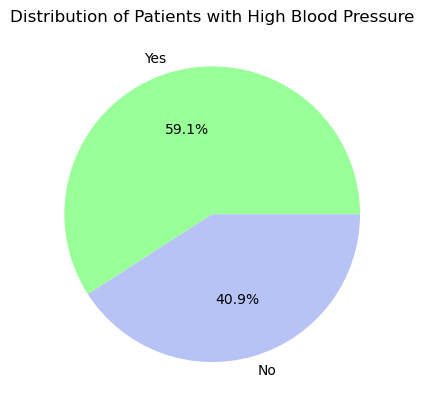

In [38]:
# HighBlood
highblood_counts = df["HighBlood"].value_counts()
highblood_labels = ["Yes", "No"]
colors = ['#99FF99', '#B7C3F5'] 

plt.title("Distribution of Patients with High Blood Pressure")
plt.pie(highblood_counts, labels=highblood_labels, colors=colors, autopct='%.01f%%')


Text(0, 0.5, 'Frequency')

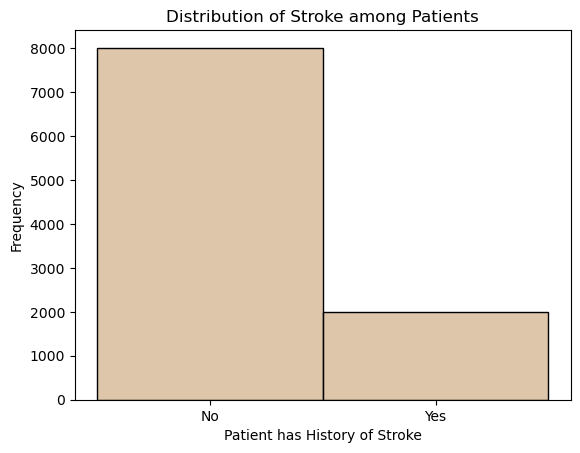

In [39]:
# Stroke
plt.title("Distribution of Stroke among Patients")
seaborn.histplot(data=df, x="Stroke", color="tan", edgecolor="black")
plt.xlabel("Patient has History of Stroke")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x19fe512fe10>,
 [Text(-0.6725582094819338, 0.8704398054193382, 'Yes'),
  Text(0.6725582094819337, -0.8704398054193383, 'No')],
 [Text(-0.36684993244469116, 0.47478534841054804, '70.9%'),
  Text(0.36684993244469105, -0.4747853484105481, '29.1%')])

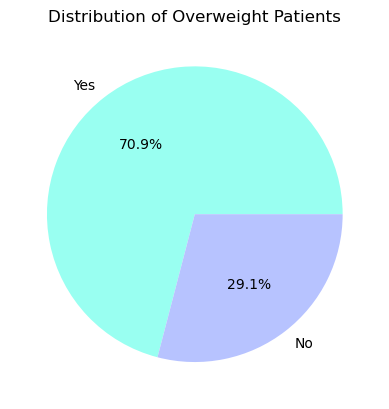

In [40]:
# Overweight
overweight_counts = df["Overweight"].value_counts()
overweight_labels = ["Yes", "No"]
colors = ['#99FFF1', '#B7C3FF'] 

plt.title("Distribution of Overweight Patients")
plt.pie(overweight_counts, labels=overweight_labels, colors=colors, autopct='%.01f%%')


Text(0, 0.5, 'Frequency')

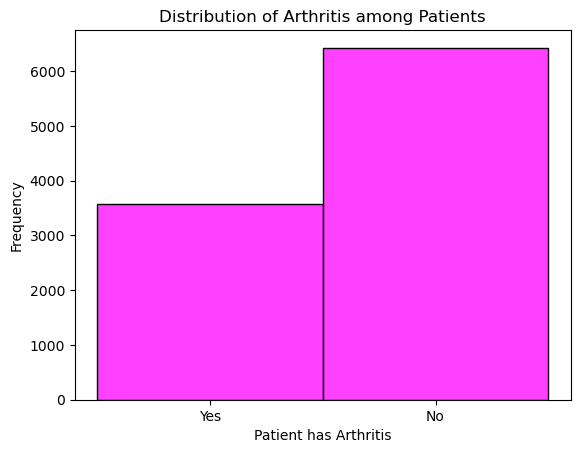

In [41]:
# Arthritis
plt.title("Distribution of Arthritis among Patients")
seaborn.histplot(data=df, x="Arthritis", color='magenta', edgecolor="black")
plt.xlabel("Patient has Arthritis")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x19fe56ca5d0>,
 [Text(-0.7175410579249271, 0.8337474618803806, 'Yes'),
  Text(0.7175409798638528, -0.8337475290614194, 'No')],
 [Text(-0.3913860315954147, 0.4547713428438439, '72.6%'),
  Text(0.39138598901664695, -0.45477137948804686, '27.4%')])

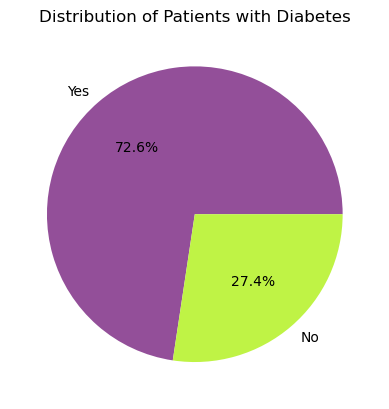

In [42]:
# Diabetes
diabetes_counts = df["Diabetes"].value_counts()
diabetes_labels = ["Yes", "No"]
colors = ['#934F99', '#BFF345'] 

plt.title("Distribution of Patients with Diabetes")
plt.pie(diabetes_counts, labels=diabetes_labels, colors=colors, autopct='%.01f%%')


Text(0, 0.5, 'Frequency')

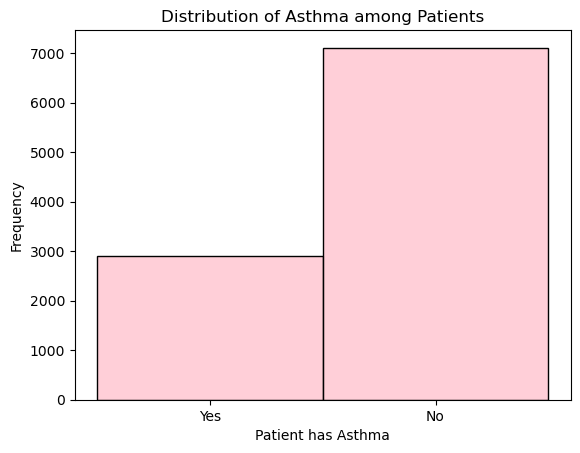

In [43]:
# Asthma
plt.title("Distribution of Asthma among Patients")
seaborn.histplot(data=df, x="Asthma", color="pink", edgecolor="black")
plt.xlabel("Patient has Asthma")
plt.ylabel("Frequency")

Text(0, 0.5, 'Service Provided')

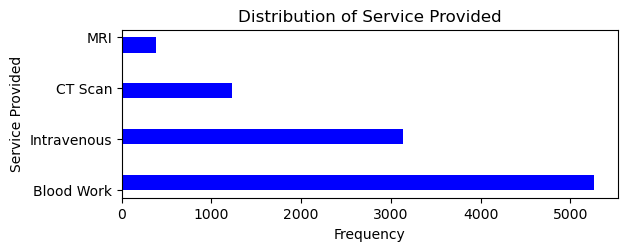

In [44]:
plt.subplot(2,1,1)
plt.title("Distribution of Service Provided")
plt.hist(data=df, x="Services", orientation="horizontal", color="blue")
plt.xlabel("Frequency")
plt.ylabel("Service Provided")

In [45]:
# Bivariates (all independent w/ Initial_days)

Text(0, 0.5, 'Initial Days')

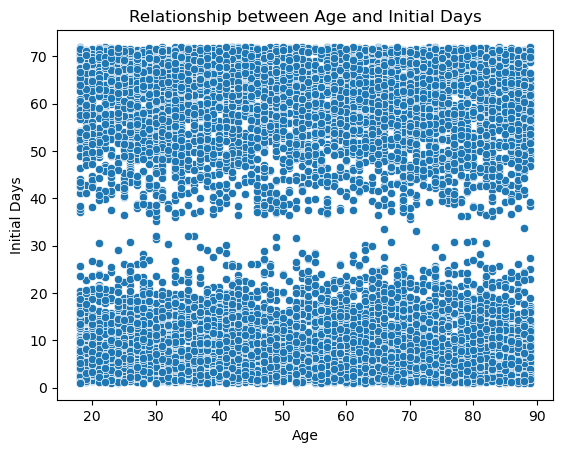

In [46]:
# Age
# seaborn.set_theme(style='whitegrid')
plt.title("Relationship between Age and Initial Days")
seaborn.scatterplot(data=df, x="Age", y="Initial_days")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

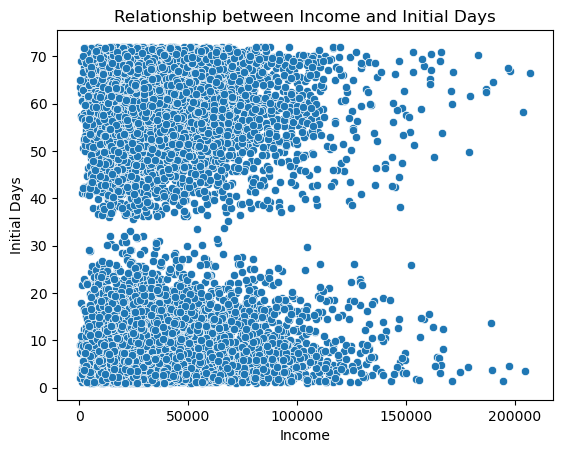

In [47]:
# Income
plt.title("Relationship between Income and Initial Days")
seaborn.scatterplot(data=df, x="Income", y="Initial_days")
plt.ylabel("Initial Days")

In [48]:
# VitD_levels

Text(0.5, 0, 'Vitamin D Levels')

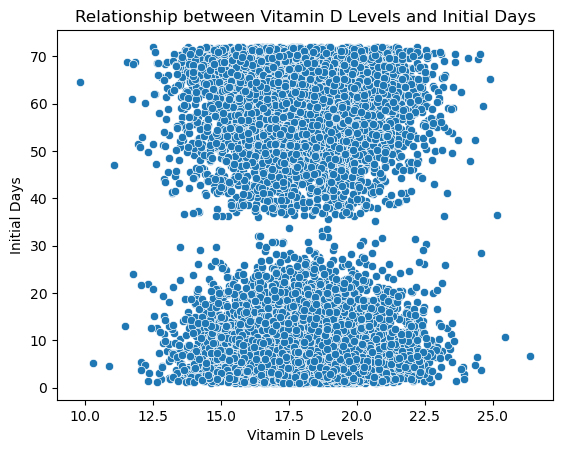

In [49]:
plt.title("Relationship between Vitamin D Levels and Initial Days")
seaborn.scatterplot(data=df, x="VitD_levels", y="Initial_days")
plt.ylabel("Initial Days")
plt.xlabel("Vitamin D Levels")

Text(0.5, 0, 'Doctor Visits')

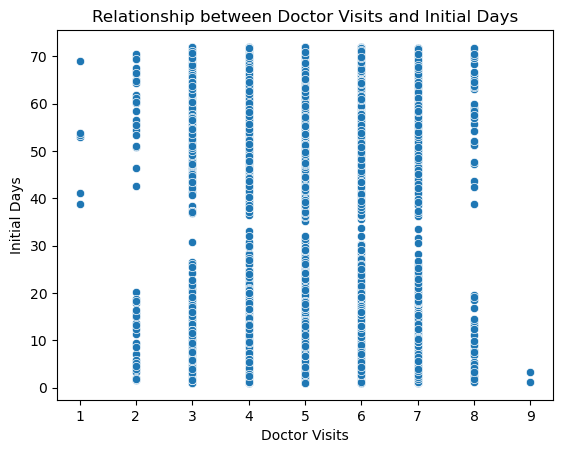

In [50]:
# Doc_visits
plt.title("Relationship between Doctor Visits and Initial Days")
seaborn.scatterplot(data=df, x="Doc_visits", y="Initial_days")
plt.ylabel("Initial Days")
plt.xlabel("Doctor Visits")

Text(0.5, 0, 'Full Meals Eaten')

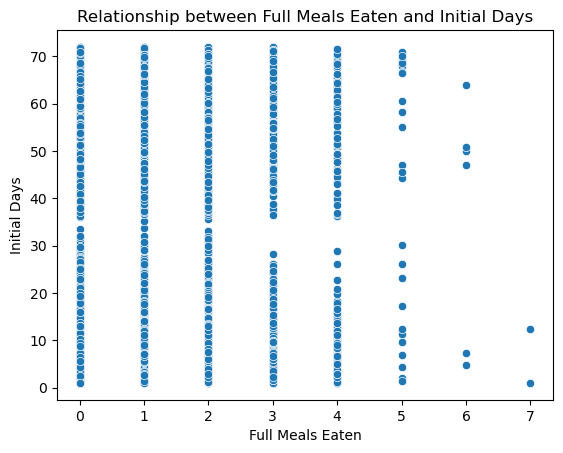

In [51]:
# Full_meals_eaten
plt.title("Relationship between Full Meals Eaten and Initial Days")
seaborn.scatterplot(data=df, x="Full_meals_eaten", y="Initial_days")
plt.ylabel("Initial Days")
plt.xlabel("Full Meals Eaten")

Text(0, 0.5, 'Initial Days')

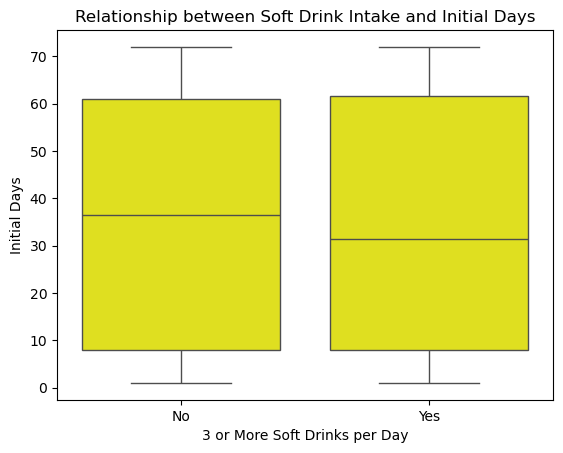

In [52]:
# Soft_drink
plt.title("Relationship between Soft Drink Intake and Initial Days")
seaborn.boxplot(data=df, x="Soft_drink", y="Initial_days", color="yellow")
plt.xlabel("3 or More Soft Drinks per Day")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

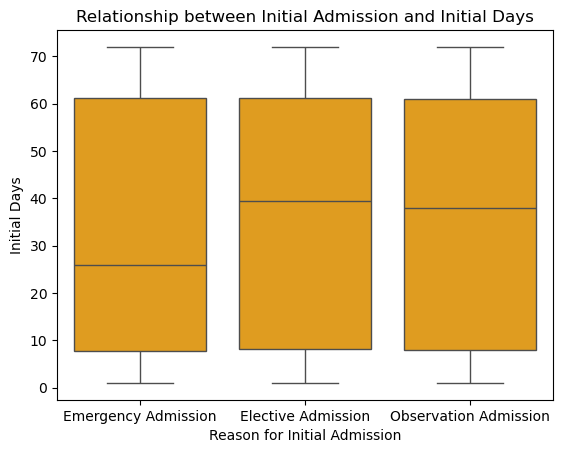

In [53]:
# Initial_admin
plt.title("Relationship between Initial Admission and Initial Days")
seaborn.boxplot(data=df, x="Initial_admin", y="Initial_days", color="orange")
plt.xlabel("Reason for Initial Admission")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

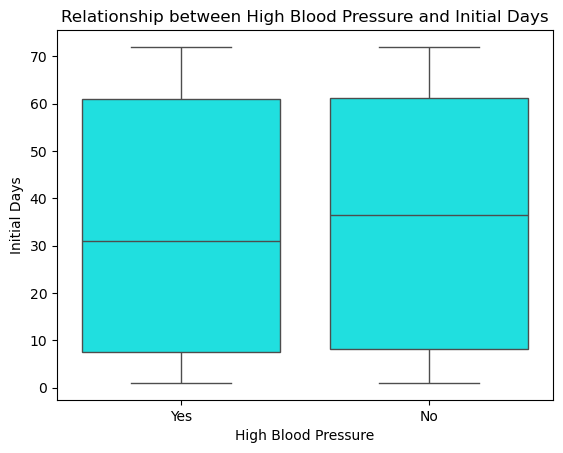

In [54]:
# HighBlood
plt.title("Relationship between High Blood Pressure and Initial Days")
seaborn.boxplot(data=df, x="HighBlood", y="Initial_days", color="cyan")
plt.xlabel("High Blood Pressure")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

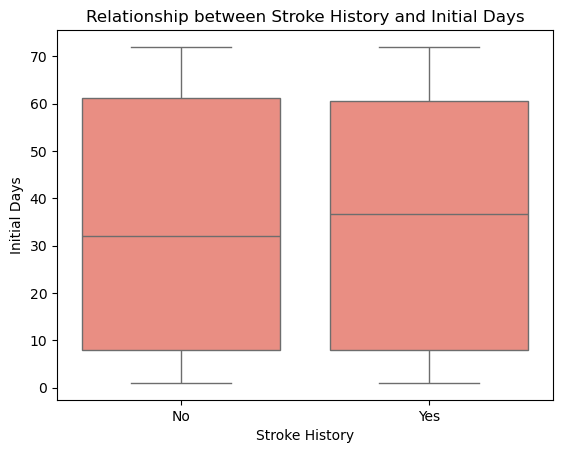

In [55]:
# Stroke
plt.title("Relationship between Stroke History and Initial Days")
seaborn.boxplot(data=df, x="Stroke", y="Initial_days", color="salmon")
plt.xlabel("Stroke History")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

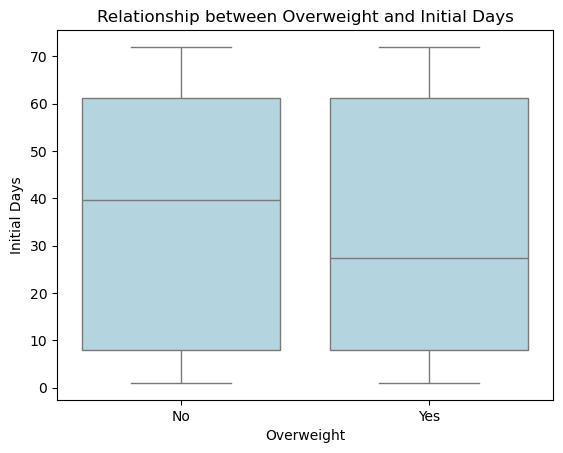

In [56]:
# Overweight
plt.title("Relationship between Overweight and Initial Days")
seaborn.boxplot(data=df, x="Overweight", y="Initial_days", color="lightblue")
plt.xlabel("Overweight")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

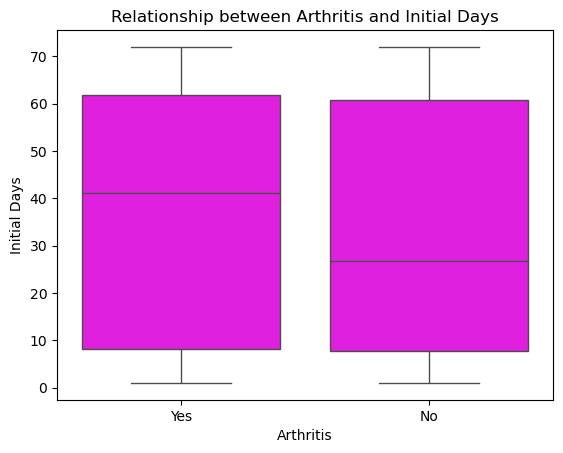

In [57]:
# Arthritis
plt.title("Relationship between Arthritis and Initial Days")
seaborn.boxplot(data=df, x="Arthritis", y="Initial_days", color="magenta")
plt.xlabel("Arthritis")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

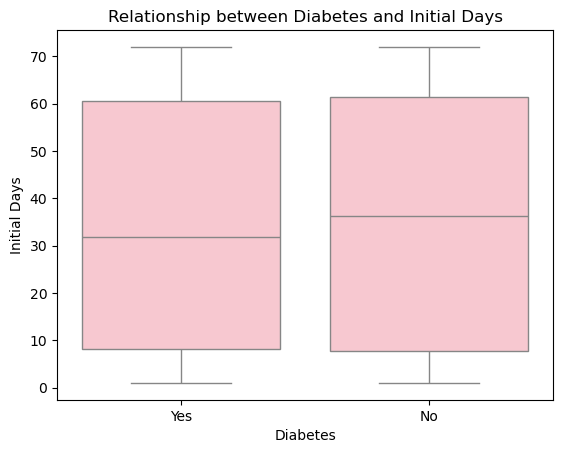

In [58]:
# Diabetes
plt.title("Relationship between Diabetes and Initial Days")
seaborn.boxplot(data=df, x="Diabetes", y="Initial_days", color="pink")
plt.xlabel("Diabetes")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

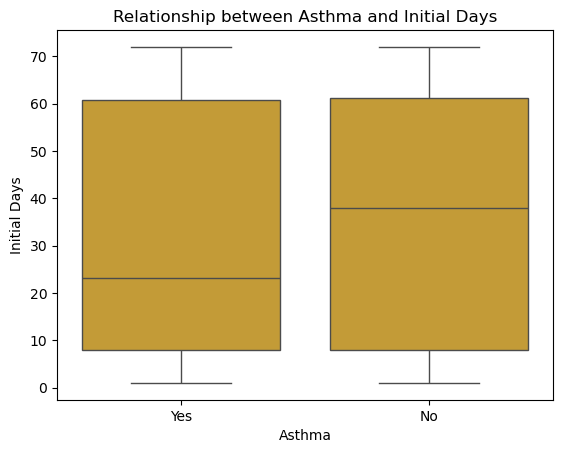

In [59]:
# Asthma
plt.title("Relationship between Asthma and Initial Days")
seaborn.boxplot(data=df, x="Asthma", y="Initial_days", color="goldenrod")
plt.xlabel("Asthma")
plt.ylabel("Initial Days")

Text(0, 0.5, 'Initial Days')

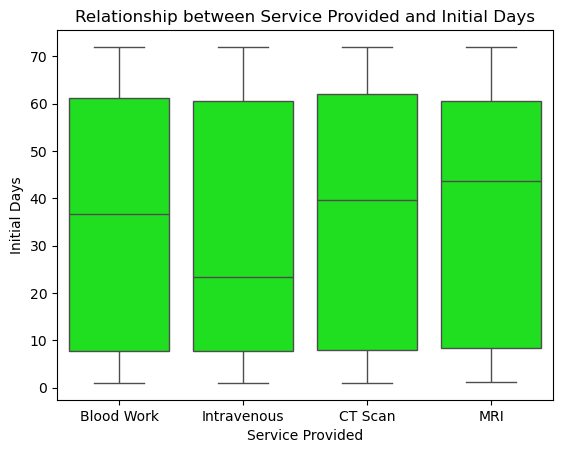

In [60]:
# Services
plt.title("Relationship between Service Provided and Initial Days")
seaborn.boxplot(data=df, x="Services", y="Initial_days", color="lime")
plt.xlabel("Service Provided")
plt.ylabel("Initial Days")

C4:  Data Transformation

In [62]:
# Remove outliers
# Change booleans/categoricals into numbers
# Create dummy variables and drop regular columns

In [63]:
# Remove outliers (> {Mean + 2*std})

In [64]:
# Setting Income outliers to NAs
df['Income'] = np.where(df['Income'] > 97532.79, np.nan, df['Income'])

# Setting Income NaN outliers to Median value
df['Income'].fillna(df['Income'].median(), inplace=True)



In [65]:
# Setting values to 2 decimal places to better represent income
df['Income'] = df.Income.round(2)

In [66]:
# VitD_levels outliers
df['VitD_levels'] = np.where(df['VitD_levels'] > 21.99, np.nan, df['VitD_levels'])
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)


In [67]:
# Full_meals_eaten outliers
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 3, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].fillna(df['Full_meals_eaten'].median(), inplace=True)

In [68]:
# Reexpress booleans/categoricals into numeric values

In [69]:
df['Soft_drink'] = df['Soft_drink'].map({'Yes': '1', 'No': '0'})

In [70]:
df['HighBlood'] = df['HighBlood'].map({'Yes': '1', 'No': '0'})

In [71]:
df['Stroke'] = df['Stroke'].map({'Yes': '1', 'No': '0'})


In [72]:
df['Overweight'] = df['Overweight'].map({'Yes': '1', 'No': '0'})

In [73]:
df['Arthritis'] = df['Arthritis'].map({'Yes': '1', 'No': '0'})

In [74]:
df['Diabetes'] = df['Diabetes'].map({'Yes': '1', 'No': '0'})

In [75]:
df['Asthma'] = df['Asthma'].map({'Yes': '1', 'No': '0'})

In [76]:
# Create dummy variables and adding to dataframe

In [77]:
# Initial_admin dummies
initial_admin_dummies = pd.get_dummies(df.Initial_admin, columns=['Elective Admission', 'Emergency Admission'])

In [78]:
df.insert(25, 'Initial_admin_elective_admission', initial_admin_dummies['Elective Admission'])

In [79]:
df.insert(25, 'Initial_admin_emergency_admission', initial_admin_dummies['Emergency Admission'])

In [80]:
# Services dummies
services_dummies = pd.get_dummies(df.Services, columns=['Blood Work', 'Intravenous', 'CT Scan'])
                    

In [81]:
df.insert(41, 'Services_blood_work', services_dummies['Blood Work'])

In [82]:
df.insert(41, 'Services_intravenous', services_dummies['Intravenous'])

In [83]:
df.insert(41, 'Services_ct_scan', services_dummies['CT Scan'])

In [84]:
# Map dummies to numerical values

In [85]:
df['Initial_admin_elective_admission'] = df['Initial_admin_elective_admission'].astype(int)

In [86]:
df['Initial_admin_emergency_admission'] = df['Initial_admin_emergency_admission'].astype(int)

In [87]:
df['Services_blood_work'] = df['Services_blood_work'].astype(int)

In [88]:
df['Services_intravenous'] = df['Services_intravenous'].astype(int)

In [89]:
df['Services_ct_scan'] = df['Services_ct_scan'].astype(int)

In [90]:
# Drop unneeded columns

In [91]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Marital', 'Gender', 'ReAdmis', 'vitD_supp', 'Initial_admin', 'Complication_risk', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)


C5:  Prepared Data

In [93]:
# Create .csv

In [94]:
df.to_csv('cleanmlrdata.csv', index=False)


SECOND PART

D1:  Initial Model

In [97]:
# Create model
df = pd.read_csv("C:/Users/Owner/cleanmlrdata.csv")

In [98]:
# Multiple Linear Regression (Course Materials, 2024)

In [99]:
# Independent variables dataframe w/ added constant
X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Asthma', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan']].assign(const=1)



In [100]:
# Dependent variable

In [101]:
y = df.Initial_days

In [102]:
# OLS regression model for MLR


mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.071
Date:                Sun, 12 May 2024   Prob (F-statistic):              0.377
Time:                        21:06:13   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9982   BIC:                         9.392e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age   

In [103]:
# Grabbing original RSE for E2
rse = np.sqrt(res.mse_resid)
print(rse)

26.307762627112016


D2:  Justification of Model Reduction

In [105]:
# (Zach, 2020)
# Higher than 5 or so should be removed
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,1.001294,Age
1,1.001855,Income
2,1.003307,VitD_levels
3,1.002059,Doc_visits
4,1.001952,Full_meals_eaten
5,1.001770,Soft_drink
6,1.524045,Initial_admin_emergency_admission
7,1.522394,Initial_admin_elective_admission
8,1.001605,HighBlood
9,1.001234,Stroke


In [106]:
# Use p-values and VIFs and remove one at a time

In [107]:
# Remove const
# Remove Services_blood_work
# Remove Services_intravenous
# Remove all except arthritis

In [108]:
# First reducation
# Remove const and Services_blood_work

In [109]:
X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Asthma', 'Services_intravenous', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.394e+04
Df Residuals:                    9984   BIC:                                  9.405e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [110]:
#  Second reduction Services_intravenous

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1118.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.394e+04
Df Residuals:                    9985   BIC:                                  9.405e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [111]:
#  END removed for VIF, now removed for p-values

In [112]:
# 3rd reduction HighBlood removed

In [113]:
X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1198.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.394e+04
Df Residuals:                    9986   BIC:                                  9.404e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [114]:
# 4th Reduction Stroke removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Overweight', 'Arthritis', 'Diabetes', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1290.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9987   BIC:                                  9.403e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [115]:
# 5th Reduction Overweight removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Arthritis', 'Diabetes', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1398.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9988   BIC:                                  9.402e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [116]:
# 6th Reduction Full_meals_eaten removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Arthritis', 'Diabetes', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1525.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9989   BIC:                                  9.401e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [117]:
# 7th Reduction Diabetes removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Arthritis', 'Asthma', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1678.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46954.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9990   BIC:                                  9.400e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [118]:
# 8th Reduction Asthma removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Arthritis', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1864.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46955.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9991   BIC:                                  9.399e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [119]:
# 9th Reduction Soft_drink removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'Arthritis', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              2097.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46955.
No. Observations:               10000   AIC:                                  9.393e+04
Df Residuals:                    9992   BIC:                                  9.398e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [120]:
# 10th Reduction Initial_admin_emergency_admission removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_admin_elective_admission', 'Arthritis', 'Services_ct_scan']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              2397.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46955.
No. Observations:               10000   AIC:                                  9.392e+04
Df Residuals:                    9993   BIC:                                  9.398e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [121]:
# 11th Reduction Services_ct_scan removed

X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_admin_elective_admission', 'Arthritis']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              2796.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46956.
No. Observations:               10000   AIC:                                  9.392e+04
Df Residuals:                    9994   BIC:                                  9.397e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [122]:
# 12th Reduction Income removed

X = df[['Age', 'VitD_levels', 'Doc_visits', 'Initial_admin_elective_admission', 'Arthritis']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              3355.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46956.
No. Observations:               10000   AIC:                                  9.392e+04
Df Residuals:                    9995   BIC:                                  9.396e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [123]:
# 13th Reduction Initial_admin_elective_admission removed

X = df[['Age', 'VitD_levels', 'Doc_visits', 'Arthritis']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              4192.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46958.
No. Observations:               10000   AIC:                                  9.392e+04
Df Residuals:                    9996   BIC:                                  9.395e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

D3:  Reduced Linear Regression Model

In [125]:
X = df[['Age', 'VitD_levels', 'Doc_visits', 'Arthritis']]
y = df.Initial_days

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           Initial_days   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              4192.
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        21:06:13   Log-Likelihood:                         -46958.
No. Observations:               10000   AIC:                                  9.392e+04
Df Residuals:                    9996   BIC:                                  9.395e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

E1:  Model Comparison

In [127]:
# Compare using model evaluation metric TBD

E2:  Output and Calculations

In [129]:
# Residual plot
# Residual standard error

In [130]:
# Checking RSE for new model
# (Anonymous, n.d.)

In [131]:
rse = np.sqrt(res.mse_resid)
print(rse)

26.49825166174912


In [132]:
# Create a residual plot (aka density plot) AND a Q-Q plot (normal probability plot)


In [133]:
# Singular Residual Plot (Course Materials, n.d.)

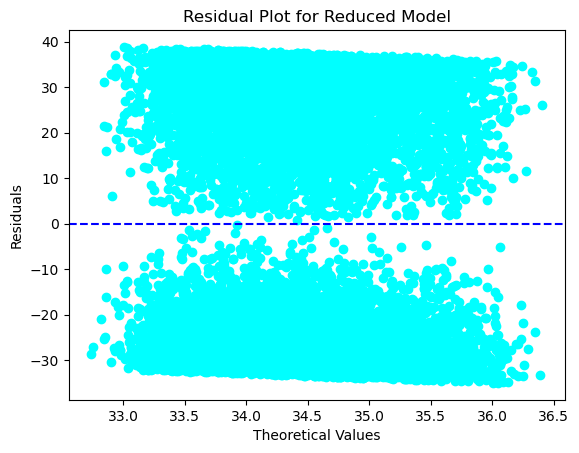

In [134]:
# Define Predictor variables
X = df[['Age', 'VitD_levels', 'Doc_visits', 'Arthritis']]
y = df['Initial_days']

# Fit model
mod = sm.OLS(y, sm.add_constant(X)).fit()
               
# Create theoretical values
y_theor = mod.predict(sm.add_constant(X))
               
# Subtract theoretical values from actual values
residuals = y - y_theor

# Create the residual plot

plt.scatter(y_theor, residuals, c="cyan")
plt.title("Residual Plot for Reduced Model")
plt.ylabel("Residuals")
plt.xlabel("Theoretical Values")
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

In [135]:
# Q-Q Plot

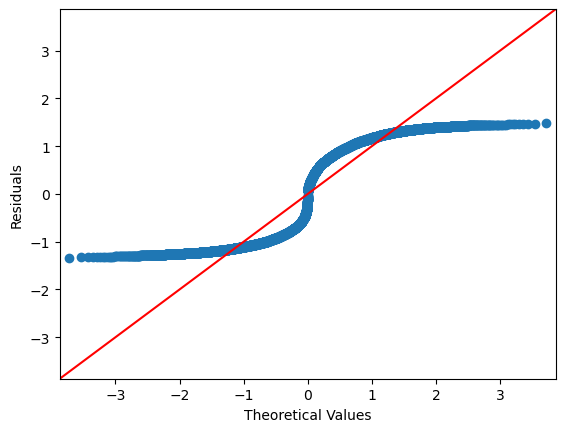

In [136]:
sm.qqplot(residuals, line='45', fit=True)
plt.xlabel("Theoretical Values")
plt.ylabel("Residuals")
plt.show()

E3:  Code